In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('dark_background')

##Ejercicio 3
Calculamos en primera instancia la divergencia de nuestro potencial para obtener las componentes x e y del campo eléctrico.
$\vec{E} = - \vec{\nabla} \phi = - \vec{\nabla}
\ln{\left(- \frac{L}{2} + x + \left[y^{2} + \left(- \frac{L}{2} + x\right)^{2} \right]^{\frac{1}{2}}\right)} - \ln{\left(\frac{L}{2} + x + \left[y^{2} + \left(\frac{L}{2} + x\right)^{2}\right]^{\frac{1}{2}} \right)}$

Luego derivamos este campo con respecto a la componente x e y.


In [2]:
#devinimos las variables simbolicas
x = sp.Symbol('x', real=True)
y = sp.Symbol('y', real=True)
L = sp.Symbol('L', real=True)

Definimos nuestro potencial con las funciones del módulo sympy para poder derivar simbolicamente.

In [3]:
phi = sp.ln((x-(L/2) + ((x-(L/2))**2 +y**2)**(1/2)))-sp.ln((x+(L/2) + ((x+(L/2))**2 +y**2)**(1/2))) #función de potencial de forma simbólica
phi

log(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - log(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)

Derivamos nuestro potencial respecto a $x$.

In [4]:
comp_x=sp.diff(phi,x) #Derivada en x
comp_x

((-0.5*L + 1.0*x)*(y**2 + (-L/2 + x)**2)**(-0.5) + 1)/(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - ((0.5*L + 1.0*x)*(y**2 + (L/2 + x)**2)**(-0.5) + 1)/(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)

Ahora, derivamos respecto a $y$.

In [6]:
comp_y=sp.diff(phi,y) #Derivada en y
comp_y

1.0*y*(y**2 + (-L/2 + x)**2)**(-0.5)/(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - 1.0*y*(y**2 + (L/2 + x)**2)**(-0.5)/(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)

En efecto, si simplificamos las expresiones obtenidas anteriormente nuestro campo eléctrico será de la forma.

$\vec{E}(x,y) =   \left[\frac{2}{\sqrt{4y^2-4Lx +4x^2+L^2}} - \frac{2}{\sqrt{4y^2+4Lx +4x^2+L^2}}\right] \hat{i} + \left[\frac{y}{\sqrt{y^2 + \left(-\frac{L}{2}+x\right)^2} \left( -\frac{L}{2} +x+ \sqrt{y^2 + \left( -\frac{L}{2} + x \right)^2}\right)  } - \frac{y}{\sqrt{y^2 + \left(\frac{L}{2}+x\right)^2} \left( \frac{L}{2} +x+ \sqrt{y^2 + \left( \frac{L}{2} + x \right)^2}\right)  } \right]\hat{j} $


Grafiquemos el campo eléctrico obtenido con las expresiones anteriores.

In [7]:
##CAMPO ELECTRICO##

n = 40 #nodos de la grilla
max = 20 #maximo y minimo del grafico

X = np.linspace(-max,max,n)
Y = np.linspace(-max,max,n)
L = 10  #Largo de la línea de carga

x,y = np.meshgrid(X,Y)

A continuación definimos las funciones para las componentes del campo eléctrico y su normalización

In [8]:
def Ex(x,y): #componente x del campo
    return ((-0.5*L + 1.0*x)*(y**2 + (-L/2 + x)**2)**(-0.5) + 1)/(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - ((0.5*L + 1.0*x)*(y**2 + (L/2 + x)**2)**(-0.5) + 1)/(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)
    #la expresión anterior se obtiene al hacer que el output de sympy nos de la expresión para el campo en un texto 'plano'

def Ey(x,y): #componente y del campo
    return 1.0*y*(y**2 + (-L/2 + x)**2)**(-0.5)/(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - 1.0*y*(y**2 + (L/2 + x)**2)**(-0.5)/(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)

def E(x,y): #normalización
    return np.sqrt((Ex(x,y))**2 + (Ey(x,y))**2)

Obtenemos la primera figura para el campo eléctrico.

Text(0.5, 1.0, '$\\vec{E}(\\vec{x})$')

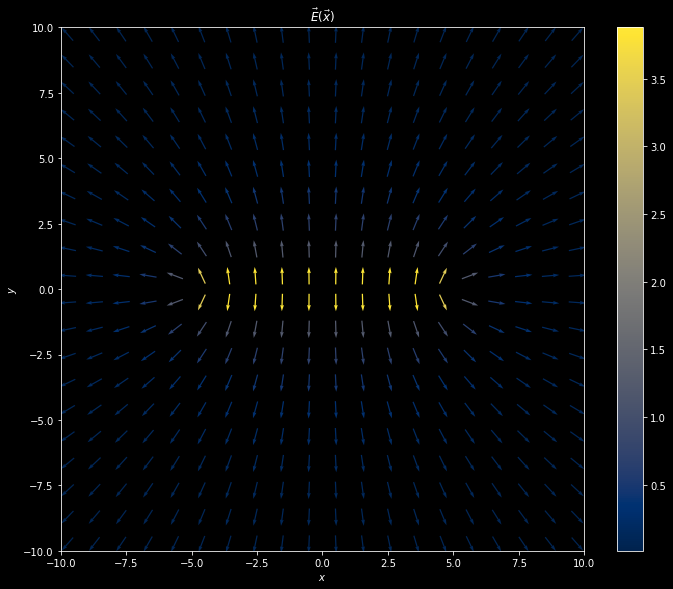

In [9]:
plt.figure(figsize=(10,8))
plt.quiver(x,y, Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),E(x,y), scale=30, pivot='middle', cmap= 'cividis')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.colorbar()
plt.tight_layout()
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title(r'$\vec{E}(\vec{x})$')

Utilizando el gráfico anterior, ploteamos las líneas de campo encima del campo eléctrico.

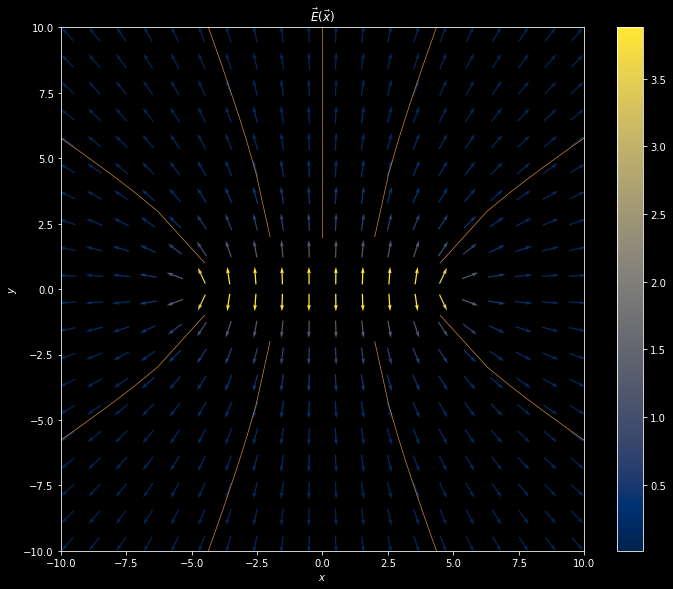

In [10]:
##LINEAS DE CAMPO##

def f(XX, t):
    x, y = XX 
    dxdt = Ex(x,y)
    dydt = Ey(x,y)
    return [dxdt, dydt]

t = np.linspace(0,5000,1000)
X0 = [[0,2],[-2,-2],[-4.5,-1],[-2,2],[-4.5,1],[2,-2],[4.5,-1],[2,2],[4.5,1]]  #condiciones iniciales representativas

plt.figure(figsize=(10,8))
for i in X0:
    if i != X0[-1]: 
        XSol = odeint(f,i,t)  #soluciones numéricas para el campo eléctrico
        xsol = XSol[:,0]
        ysol = XSol[:,1]
        plt.plot(xsol,ysol,color='peru', lw=0.7)
    else:
        XSol = odeint(f,i,t) 
        xsol = XSol[:,0]
        ysol = XSol[:,1]
        plt.plot(xsol,ysol,color='peru', lw=0.7,label='Lineas de Campo')


plt.quiver(x,y, Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),E(x,y), scale=30, pivot='middle', cmap= 'cividis')
plt.xlim(-1.1*max,1.1*max)
plt.ylim(-1.1*max,1.1*max)
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.colorbar()
plt.tight_layout()
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title(r'$\vec{E}(\vec{x})$')
plt.show()

Finalmente, calculamos las curvas equipotenciales con la función contour de matplotlib y las ploteamos encima de los gráficos anteriores.

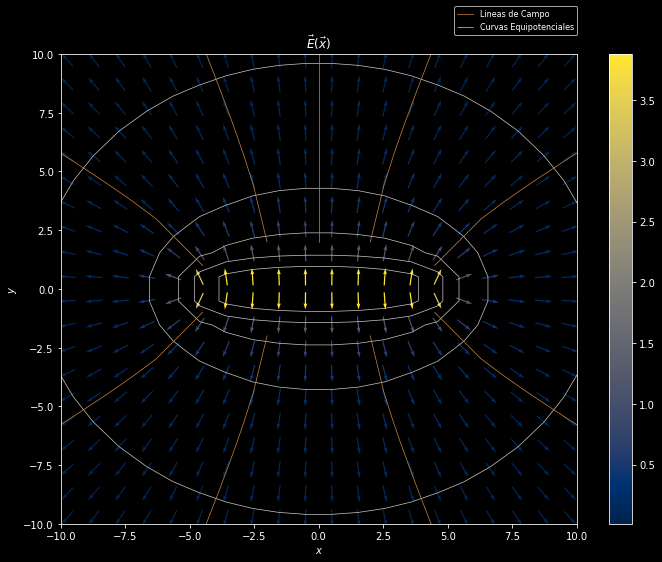

In [11]:
##CURVAS EQUIPOTENCIALES

plt.figure(figsize=(10,8))
def P(x):
    return np.log(((x-(L/2) + ((x-(L/2))**2 +y**2)**(1/2))))-np.log(((x+(L/2) + ((x+(L/2))**2 +y**2)**(1/2))))

CS=plt.contour(x,y,P(x),levels=5, colors='snow', linestyles='-', linewidths=0.7, alpha=0.8)
CS.collections[0].set_label('Curvas Equipotenciales')


for i in X0:
    if i != X0[-1]: 
        XSol = odeint(f,i,t)  #solucion
        xsol = XSol[:,0]
        ysol = XSol[:,1]
        plt.plot(xsol,ysol,color='peru', lw=0.7)
    else:
        XSol = odeint(f,i,t)  #solucion
        xsol = XSol[:,0]
        ysol = XSol[:,1]
        plt.plot(xsol,ysol,color='peru', lw=0.7,label='Lineas de Campo')


plt.quiver(x,y, Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),E(x,y), scale=30, pivot='middle', cmap= 'cividis')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.colorbar()
plt.tight_layout()
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title(r'$\vec{E}(\vec{x})$')
plt.legend(bbox_to_anchor = (0.755, 1.11),fontsize=8)
plt.tight_layout()
# plt.savefig('1.pdf',format='pdf', dpi=600)
plt.show()